## CARDIOVASCULAR DATA

Project Description:
Business Context:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.



## IMPORT LIBRARIES

In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## DATA GATHERING

In [284]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\data_cardiovascular_risk.csv")
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

## EDA

In [285]:
df.drop(columns=['id'],inplace=True)

In [286]:
df.shape

(3390, 16)

In [287]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [288]:
q=df['TenYearCHD'].value_counts()
q

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


Data contains 9 float, 5 integer & 2 object.

In [290]:
df.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

INTERPRETATION: Highest age of person is 70 & minimum age is 32.
                Highest age of person is 70 & minimum age is 32. 696.000000	295.00000	142.500000	56.800000	143.000000	394.000000

In [291]:
dep_var= 'TenYearCHD'
dep_var

'TenYearCHD'

In [292]:
Categorical_var=[i for i in df.columns if df[i].nunique()<=4]
Categorical_var

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [293]:
Continuous_var=[i for i in df.columns if i not in Categorical_var]
Continuous_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

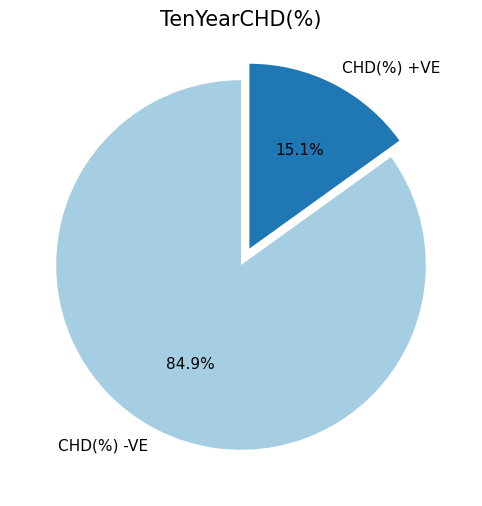

In [294]:
colors=sns.color_palette("Paired")
plt.figure(figsize=(10,6))
explode=[0,0.1]
textprops={'fontsize':11}
plt.pie(df['TenYearCHD'].value_counts(),labels=['CHD(%) -VE','CHD(%) +VE'],startangle=90,colors=colors,explode=explode,autopct="%1.1f%%",textprops=textprops)
plt.title('TenYearCHD(%)',fontsize=15)
plt.show()

INTERPRETATION: The number of patients not having heart disease is greater than number of patients having heart disease.

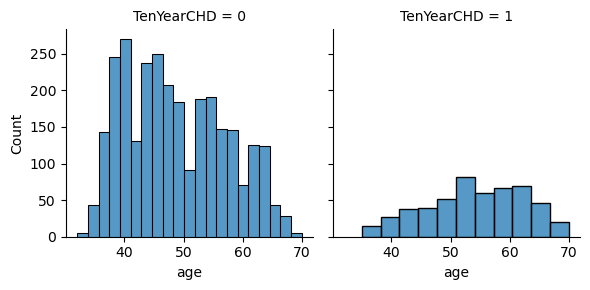

In [295]:
g = sns.FacetGrid(df, col="TenYearCHD")
g.map(sns.histplot, "age");

INTERPRETATION: People having age 50-55 & 40-42 have higher number of heart disease.

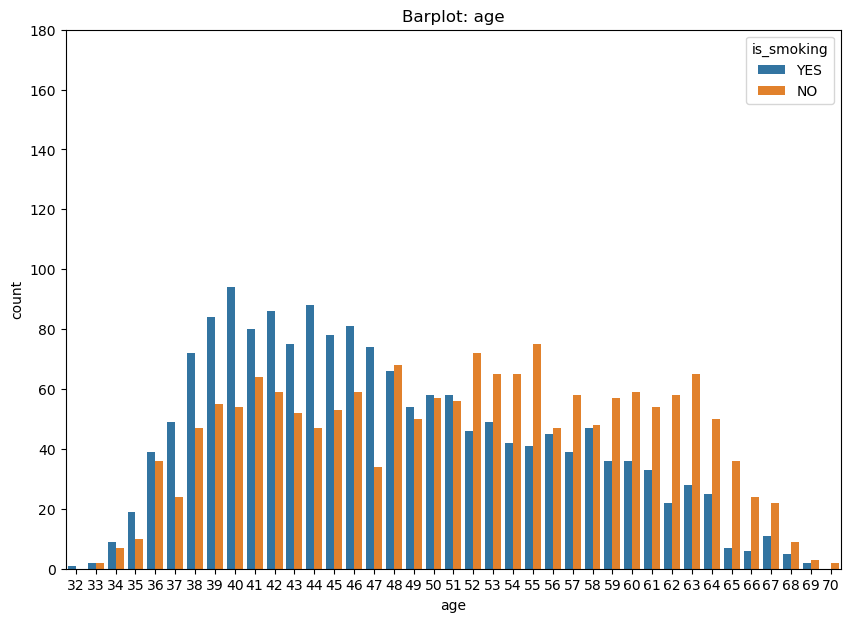

In [296]:
plt.figure(figsize=(10,7))
plt.title('Barplot: age')
plt.ylim(0,180)
plt.xlabel('age')
sns.countplot(data=df, x='age', hue='is_smoking');

INTERPRETATION: People at age 40 & people form age 52 smokes less.

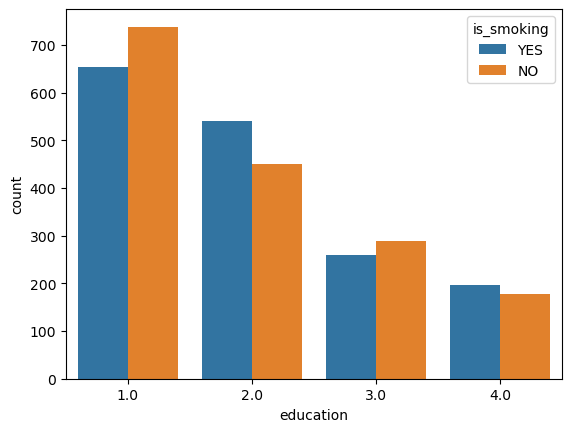

In [297]:
sns.countplot(data=df, x='education',hue='is_smoking');

INTERPRETATION: People having less education smokes more.

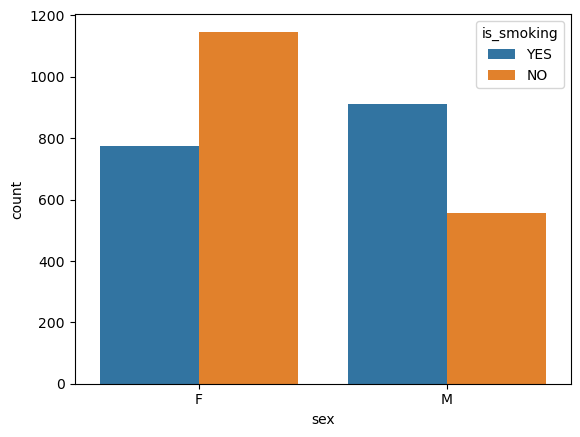

In [298]:
sns.countplot(data=df, x='sex',hue='is_smoking');

INTERPRETATION: Females smokes less than males.

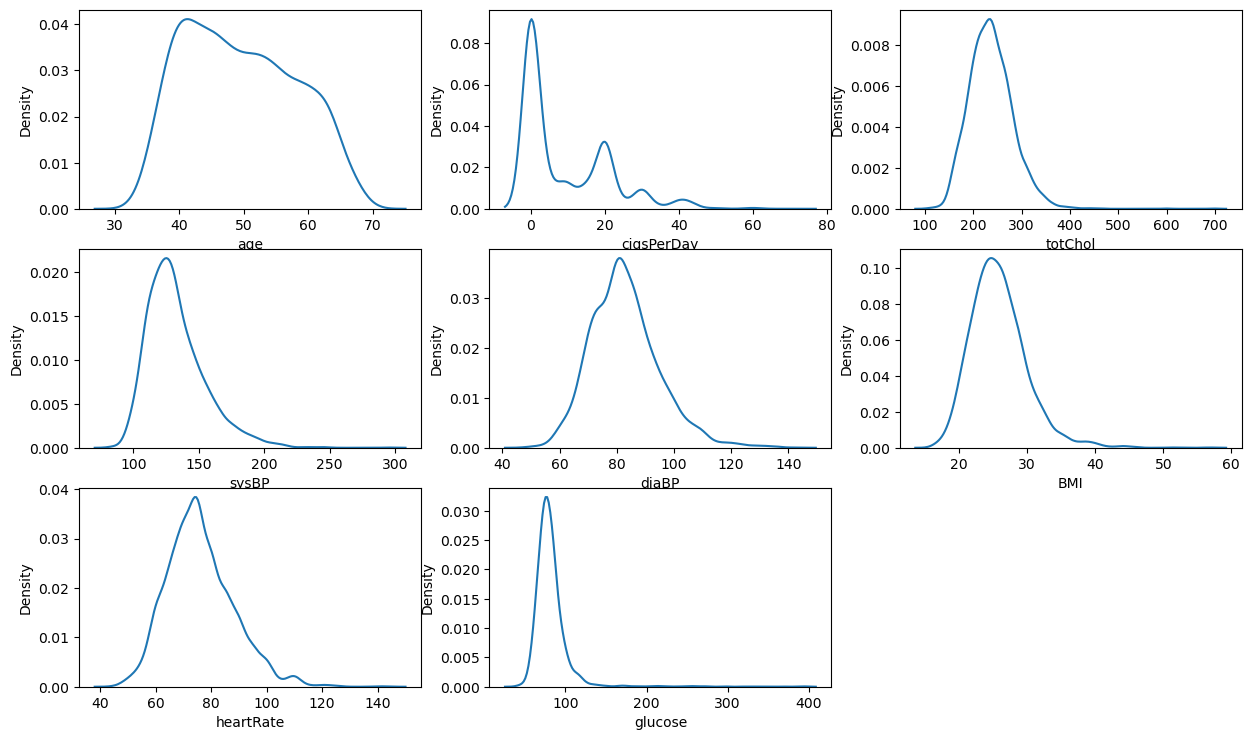

In [299]:
plt.figure(figsize=(15,15))
for i in range(0,len(Continuous_var)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(df[Continuous_var[i]])

INTERPRETATION: except age cigsPerDay all attributes are rightly skewed.

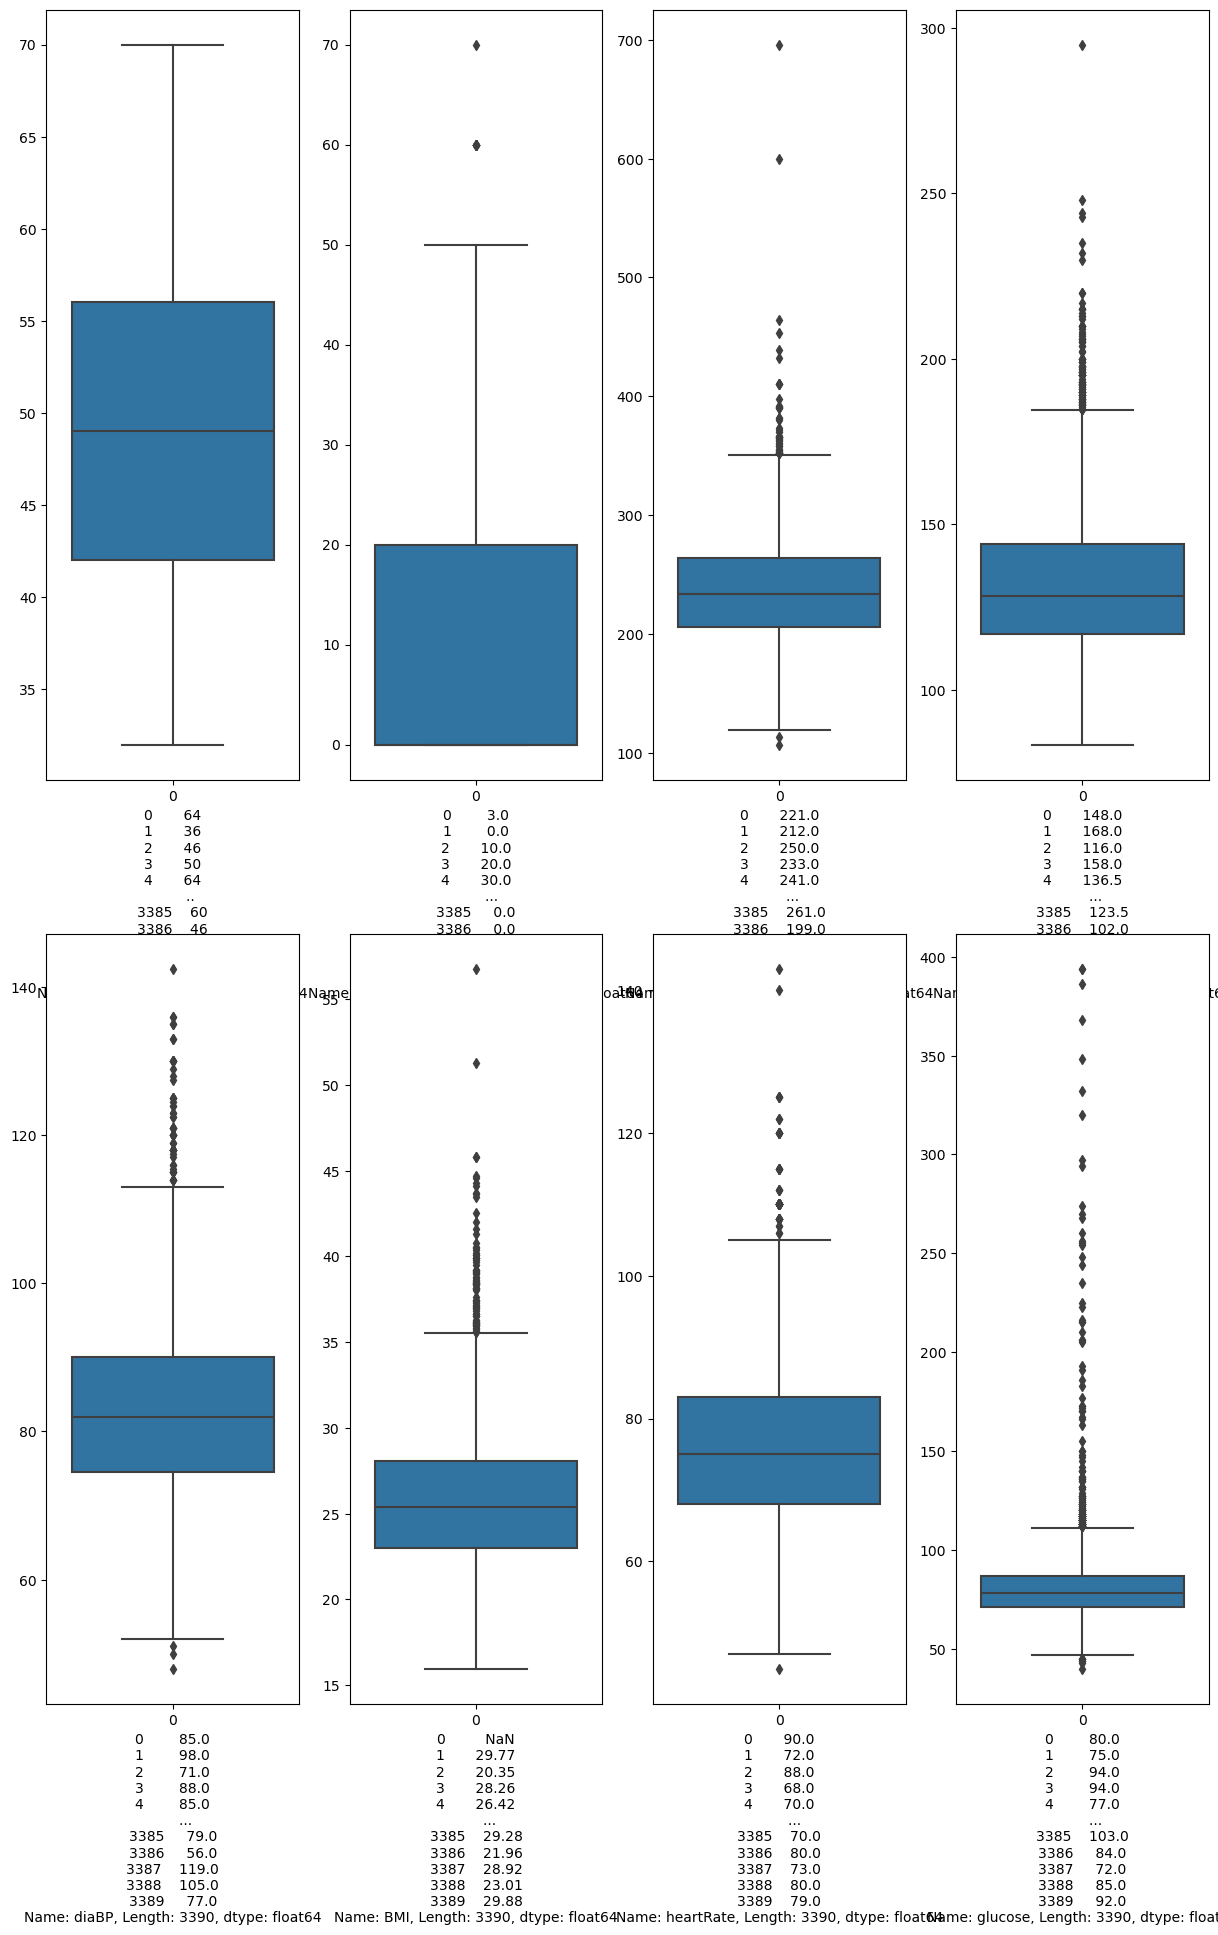

In [300]:
plt.figure(figsize=(15,22))
for i in range(0,len(Continuous_var)):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[Continuous_var[i]])
    plt.xlabel(df[Continuous_var[i]])

INTERPRETATION:

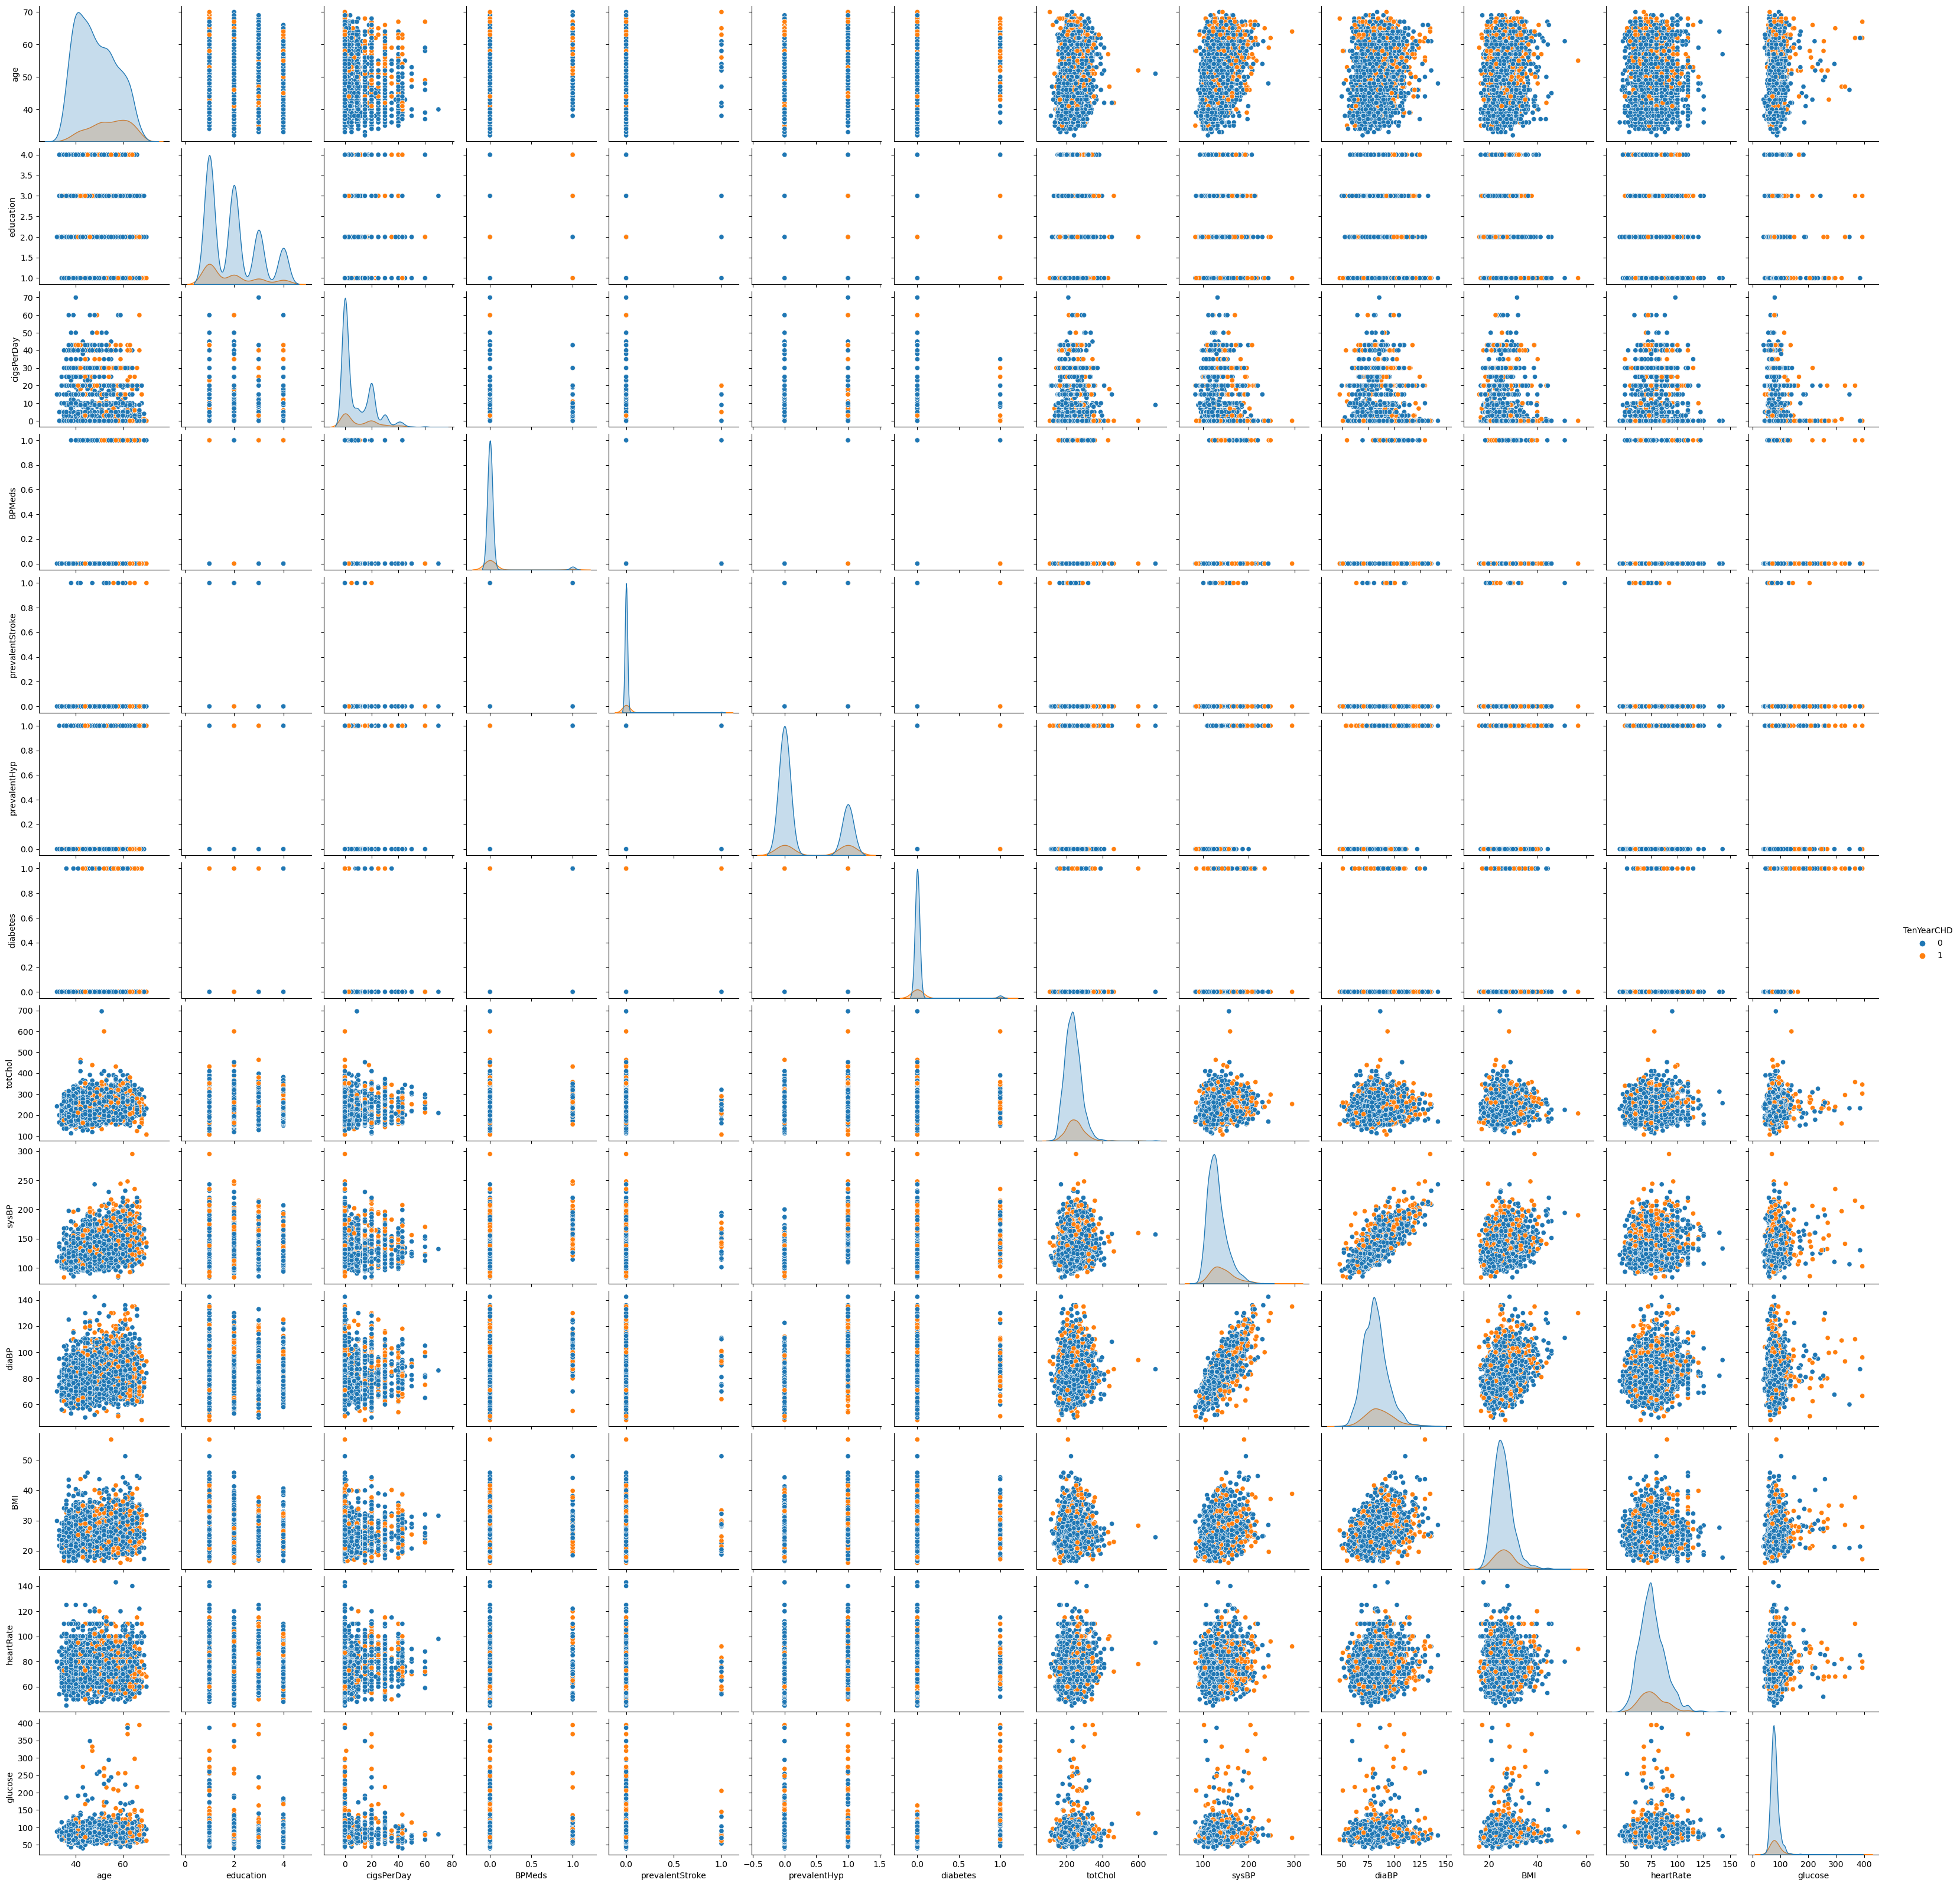

In [301]:
sns.pairplot(df,hue='TenYearCHD')
plt.show()

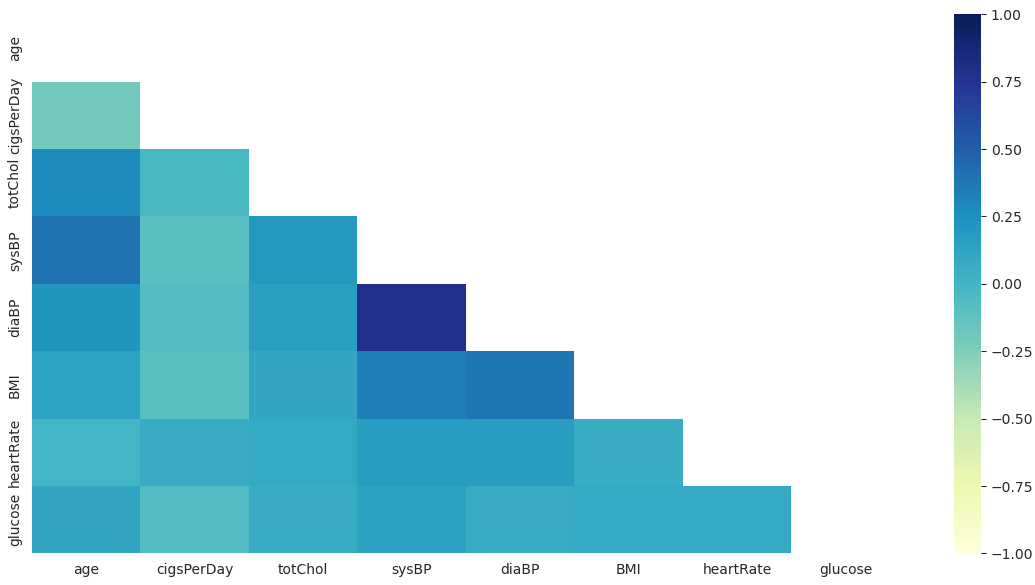

In [302]:
corr=df[Continuous_var].corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(14,7))
    ax=sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,annot=False,cmap="YlGnBu")

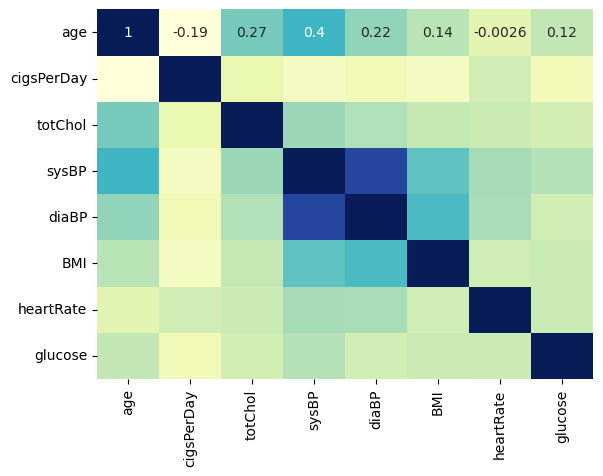

In [303]:
sns.heatmap(data=df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].corr(), annot=True, cbar=False,cmap='YlGnBu');

## DATA PRE-PROCESSING

In [304]:
for i in df.columns.tolist():
    print('no. of unique valuesin', i ,'is' ,df[i].nunique())

no. of unique valuesin age is 39
no. of unique valuesin education is 4
no. of unique valuesin sex is 2
no. of unique valuesin is_smoking is 2
no. of unique valuesin cigsPerDay is 32
no. of unique valuesin BPMeds is 2
no. of unique valuesin prevalentStroke is 2
no. of unique valuesin prevalentHyp is 2
no. of unique valuesin diabetes is 2
no. of unique valuesin totChol is 240
no. of unique valuesin sysBP is 226
no. of unique valuesin diaBP is 142
no. of unique valuesin BMI is 1259
no. of unique valuesin heartRate is 68
no. of unique valuesin glucose is 132
no. of unique valuesin TenYearCHD is 2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'education'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'is_smoking'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'BPMeds'),
  Text(6, 0, 'prevalentStroke'),
  Text(7, 0, 'prevalentHyp'),
  Text(8, 0, 'diabetes'),
  Text(9, 0, 'totChol'),
  Text(10, 0, 'sysBP'),
  Text(11, 0, 'diaBP'),
  Text(12, 0, 'BMI'),
  Text(13, 0, 'heartRate'),
  Text(14, 0, 'glucose'),
  Text(15, 0, 'TenYearCHD')])

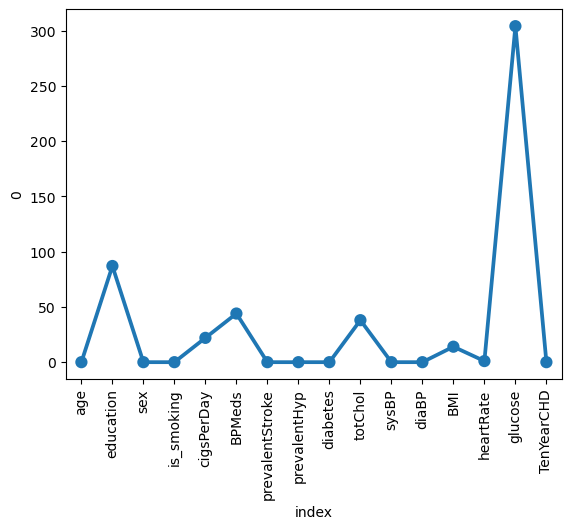

In [305]:
#no of null values
a=df.isnull().sum().reset_index()
sns.pointplot(x='index',y=0,data=a)
plt.xticks(rotation=90)

INTERPRETATION: Glucose have high count of null values.

In [306]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [307]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [308]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [309]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())

In [310]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [311]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [312]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [313]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [314]:
df

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
1      36        4.0   M         NO         0.0     0.0                0   
2      46        1.0   F        YES        10.0     0.0                0   
3      50        1.0   M        YES        20.0     0.0                0   
4      64        1.0   F        YES        30.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     0.0                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3390 rows x 16 columns]

In [315]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [316]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

ENCODING

In [317]:
#REPLACING STRING VALUES WITH BINARY COLUMN 0 & 1
df['sex']=np.where(df['sex']=='M',1,0)
df['is_smoking']=np.where(df['is_smoking']=='YES',1,0)

In [318]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0    0           1         3.0     0.0                0   
1   36        4.0    1           0         0.0     0.0                0   
2   46        1.0    0           1        10.0     0.0                0   
3   50        1.0    1           1        20.0     0.0                0   
4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [319]:
df=pd.get_dummies(df,columns=['education'])

In [320]:
df['education_1.0']=np.where(df['education_1.0']=='False',0,1)
df['education_2.0']=np.where(df['education_2.0']=='False',0,1)
df['education_3.0']=np.where(df['education_3.0']=='False',0,1)
df['education_4.0']=np.where(df['education_4.0']=='False',0,1)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int32  
 2   is_smoking       3390 non-null   int32  
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
 15  education_1.0    3390 non-null   int32  
 16  education_2.0    3390 non-null   int32  
 17  education_3.0 

In [322]:
df.head()

age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64    0           1         3.0     0.0                0             0   
1   36    1           0         0.0     0.0                0             1   
2   46    0           1        10.0     0.0                0             0   
3   50    1           1        20.0     0.0                0             1   
4   64    0           1        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
0         0    221.0  148.0   85.0  25.38       90.0     80.0           1   
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0   
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0   
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1   
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0   

   education_1.0  education_2.0  education_3.0  education_4.0  
0              1              1              1              1  
1              1              1              1              1  
2              1              1              1              1  
3              1              1              1              1  
4              1              1              1              1

# MACHINE LEARNING

In [323]:
x = df.drop(['TenYearCHD'],axis=1)
y = df['TenYearCHD']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify = y)

In [324]:
x_train.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
education_1.0      0
education_2.0      0
education_3.0      0
education_4.0      0
dtype: int64

In [325]:
y_train.value_counts()

TenYearCHD
0    2303
1     409
Name: count, dtype: int64

# 1) LOGISTIC REGRESSION

In [326]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

# EVALUATION

In [327]:
# Testing data evaluation
y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,y_pred_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_log)
print('classification_report : \n',clf_report)


confusion matrix :
 [[572   4]
 [ 94   8]]
Accuracy Score :  0.855457227138643
classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       576
           1       0.67      0.08      0.14       102

    accuracy                           0.86       678
   macro avg       0.76      0.54      0.53       678
weighted avg       0.83      0.86      0.80       678



In [328]:
# Training data evaluation
y_pred_train_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report : \n',clf_report)


confusion matrix :
 [[2290   13]
 [ 373   36]]
Accuracy Score :  0.8576696165191741
classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2303
           1       0.73      0.09      0.16       409

    accuracy                           0.86      2712
   macro avg       0.80      0.54      0.54      2712
weighted avg       0.84      0.86      0.81      2712



In [329]:
LR1=print('Accuracy of LR1 :',acc_score_LR)
LR1

Accuracy of LR1 : 0.8576696165191741


# 2) KNN

# FEATURE SCALING

In [330]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [331]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [332]:
std_scaler.fit_transform(x_train)

array([[ 1.6952069 , -0.86128461, -1.00221484, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87730953, -0.86128461,  0.99779005, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40993961,  1.16105639, -1.00221484, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52678209, -0.86128461, -1.00221484, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64164273,  1.16105639,  0.99779005, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22783697,  1.16105639, -1.00221484, ...,  0.        ,
         0.        ,  0.        ]])

In [333]:
std_scaler.transform(x_test)

array([[ 0.17625464,  1.16105639,  0.99779005, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.6952069 , -0.86128461, -1.00221484, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17625464, -0.86128461, -1.00221484, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.99415201, -0.86128461,  0.99779005, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.57836442, -0.86128461, -1.00221484, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34269761,  1.16105639,  0.99779005, ...,  0.        ,
         0.        ,  0.        ]])

In [334]:
from sklearn.neighbors import KNeighborsClassifier

In [335]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [336]:
# Testing data evaluation
y_pred_knn = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy Score : ",acc_score_KNN)

clf_report = classification_report(y_test , y_pred_knn)
print('classification_report : \n',clf_report)


confusion matrix :
 [[560  16]
 [ 93   9]]
Accuracy Score :  0.8597481545809813
classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       576
           1       0.36      0.09      0.14       102

    accuracy                           0.84       678
   macro avg       0.61      0.53      0.53       678
weighted avg       0.78      0.84      0.80       678



In [337]:
# Training data evaluation
y_pred_train_knn = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_KNN = accuracy_score(y_train,y_pred_train_knn)
print("Accuracy Score : ",acc_score_KNN)

clf_report = classification_report(y_train,y_pred_train_knn)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2270   33]
 [ 332   77]]
Accuracy Score :  0.8654129793510325
classification_report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2303
           1       0.70      0.19      0.30       409

    accuracy                           0.87      2712
   macro avg       0.79      0.59      0.61      2712
weighted avg       0.85      0.87      0.83      2712



In [338]:
KNN1=print('Accuracy of KNN1: ',acc_score_KNN)
KNN1

Accuracy of KNN1:  0.8654129793510325


# 3) SVM

In [339]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [340]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [341]:
# testing data evaluation
y_pred = svc_model.predict(x_test)

acc= accuracy_score(y_test,y_pred)
print('Accuracy is:', acc)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_test,y_pred)
print('Classification Report', Clf)

Accuracy is: 0.8495575221238938
Confusion Matrix [[576   0]
 [102   0]]
Classification Report               precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.00      0.00      0.00       102

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



In [342]:
# training data evaluation
y_pred_train = svc_model.predict(x_train)

acc= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_train,y_pred_train)
print('Classification Report', Clf)

Accuracy is: 0.8506637168141593
Confusion Matrix [[2302    1]
 [ 404    5]]
Classification Report               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2303
           1       0.83      0.01      0.02       409

    accuracy                           0.85      2712
   macro avg       0.84      0.51      0.47      2712
weighted avg       0.85      0.85      0.78      2712



## Hyperparameter Tunning

In [343]:
svm_clf =SVC()
hyp = {'C': np.arange(0,10,0.1),
      'kernel':['rbf'],
      'gamma': np.arange(0,10,0.1)}

rscv_svm = RandomizedSearchCV(svm_clf, hyp, cv=3)
rscv_svm.fit(x_train, y_train)
rscv_svm.best_params_

{'kernel': 'rbf', 'gamma': 0.5, 'C': 6.4}

In [344]:
rscv_svm.best_estimator_

SVC(C=6.4, gamma=0.5)

In [345]:
rscv_svm.best_params_

{'kernel': 'rbf', 'gamma': 0.5, 'C': 6.4}

In [346]:
y_pred_rscv= rscv_svm.predict(x_test)

In [347]:
acc1= accuracy_score(y_test,y_pred_rscv)
print('Accuracy is', acc)

Accuracy is 0.8506637168141593


In [348]:
y_pred_rscv= rscv_svm.predict(x_train)
y_pred_rscv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [349]:
acc2= accuracy_score(y_train,y_pred_rscv)
print('Accuracy is', acc)

Accuracy is 0.8506637168141593


In [350]:
rscv_svm

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7....
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                                        'kernel': ['rbf']})

In [351]:
# training rscv model data evaluation
y_pred_train = rscv_svm.predict(x_train)

acc= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_train,y_pred_train)
print('Classification Report', Clf)

Accuracy is: 1.0
Confusion Matrix [[2303    0]
 [   0  409]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00       409

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



In [352]:
SVM1=print('Accuracy of SVM: ',acc)
SVM1

Accuracy of SVM:  1.0


# 4) NAIVE BAYES

In [353]:
import os
import glob
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# MODEL TRAINING

# I) BERNOULLI NB

In [354]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train,y_train)

BernoulliNB()

In [355]:
def evaluation(string, model, ind_var, act):
    print(string.center(50,'*'))
    pred = model.predict(ind_var)
    cnf_matrix = confusion_matrix(act,pred)
    print('Confusion Matrix :\n', cnf_matrix)
    
    acc_score_NB = accuracy_score(act,pred)
    print('acc_score_NB :', acc_score_NB)
    
    clf_report = classification_report(act, pred)
    print('Classification Report :\n', clf_report)

In [356]:
print('BernoulliNB Model Results'.center(80,'*'))
evaluation('Train Data Evaluation', bnb_model, x_train, y_train)
print('*#'*30)
evaluation('Test Data Evaluation', bnb_model, x_test, y_test)

***************************BernoulliNB Model Results****************************
**************Train Data Evaluation***************
Confusion Matrix :
 [[2281   22]
 [ 382   27]]
acc_score_NB : 0.8510324483775811
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2303
           1       0.55      0.07      0.12       409

    accuracy                           0.85      2712
   macro avg       0.70      0.53      0.52      2712
weighted avg       0.81      0.85      0.80      2712

*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
***************Test Data Evaluation***************
Confusion Matrix :
 [[572   4]
 [ 99   3]]
acc_score_NB : 0.8480825958702065
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       576
           1       0.43      0.03      0.06       102

    accuracy                           0.85       678
   

In [358]:
BNB1=print('Accuracy of BNB1 is 0.8510324483775811')
BNB1

Accuracy of BNB1 is 0.8510324483775811


# 5) DECISION TREE

overfitting (99 vs 72)

hyperparameter tuning()
max_depth
min_sample_leaf
min_sample_split

pruning

In [359]:
from sklearn.tree import DecisionTreeClassifier

In [360]:
dt_model = DecisionTreeClassifier()
#rscv_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [361]:
# Testing data evaluation
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred_dt)
print('classification_report : \n',clf_report)

# Accuracy Score : 0.7492625368731564 

confusion matrix :
 [[483  93]
 [ 67  35]]
Accuracy Score :  0.7640117994100295
classification_report : 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       576
           1       0.27      0.34      0.30       102

    accuracy                           0.76       678
   macro avg       0.58      0.59      0.58       678
weighted avg       0.79      0.76      0.77       678



In [362]:
# Training data evaluation
y_pred_train_dt= dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2303    0]
 [   0  409]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00       409

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



In [363]:
##HYPER PARAMETER TUNNING
dt_model=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        
      
      }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [364]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [365]:
 #Training data evaluation
rscv_model_train= rscv_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2303    0]
 [   0  409]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00       409

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



In [366]:
DT1=print('Accuracy of DT1: ',acc_score)
DT1

Accuracy of DT1:  1.0


# 6) RANDOM FOREST

Ensemle bagging Technique

In [367]:
from sklearn.ensemble import RandomForestClassifier

In [368]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [369]:
rf_model=rscv_model.best_estimator_
rf_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [370]:
# Testing data evaluation
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_RF = accuracy_score(y_test,y_pred_rf)
print("Accuracy Score : ",acc_score_RF)

clf_report = classification_report(y_test , y_pred_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[576   0]
 [102   0]]
Accuracy Score :  0.8495575221238938
classification_report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.00      0.00      0.00       102

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



In [371]:
# Training data evaluation
y_pred_train_rf= rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_rf = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy Score : ",acc_score_rf)

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2303    0]
 [ 409    0]]
Accuracy Score :  0.849188790560472
classification_report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2303
           1       0.00      0.00      0.00       409

    accuracy                           0.85      2712
   macro avg       0.42      0.50      0.46      2712
weighted avg       0.72      0.85      0.78      2712



In [372]:
## HYPERPARAMETER TUNNING
rf_model = RandomForestClassifier()
hyp = hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10),
             'n_estimators':np.arange(60,100),
             
      
      }
rscv_model = RandomizedSearchCV(rf_model,hyp,random_state=52,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   random_state=52)

In [373]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       min_samples_split=4, n_estimators=77)

In [374]:
# Training data evaluation
y_pred_train_rscv_model= rscv_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_rf = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy Score : ",acc_score_rf)

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2303    0]
 [ 409    0]]
Accuracy Score :  0.849188790560472
classification_report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2303
           1       0.00      0.00      0.00       409

    accuracy                           0.85      2712
   macro avg       0.42      0.50      0.46      2712
weighted avg       0.72      0.85      0.78      2712



In [375]:
RF1=print('Accuracy of RF1: ',acc_score_rf)


Accuracy of RF1:  0.849188790560472


# 7) ADABOOST

In [376]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# MODEL TRAINING

In [377]:
ada_boost = AdaBoostClassifier(n_estimators=1,random_state=1)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1, random_state=1)

In [378]:
# Testing data evaluation

y_pred = ada_boost.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is\n', cnf_matrix)

acc = accuracy_score(y_test,y_pred)
print('Accuracy is', acc)

clf_report= classification_report(y_test,y_pred)
print('Classification report', clf_report)

Confusion Matrix is
 [[576   0]
 [102   0]]
Accuracy is 0.8495575221238938
Classification report               precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.00      0.00      0.00       102

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678



In [379]:
# Training data evaluation

y_pred_train = ada_boost.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is\n', cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print('Accuracy is', acc)

clf_report= classification_report(y_train,y_pred_train)
print('Classification report', clf_report)

Confusion Matrix is
 [[2303    0]
 [ 409    0]]
Accuracy is 0.849188790560472
Classification report               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2303
           1       0.00      0.00      0.00       409

    accuracy                           0.85      2712
   macro avg       0.42      0.50      0.46      2712
weighted avg       0.72      0.85      0.78      2712



In [380]:
ada_boost.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [381]:
s1 = pd.Series(ada_boost.feature_importances_, index=x.columns)
s1

age                1.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
education_1.0      0.0
education_2.0      0.0
education_3.0      0.0
education_4.0      0.0
dtype: float64

<Axes: >

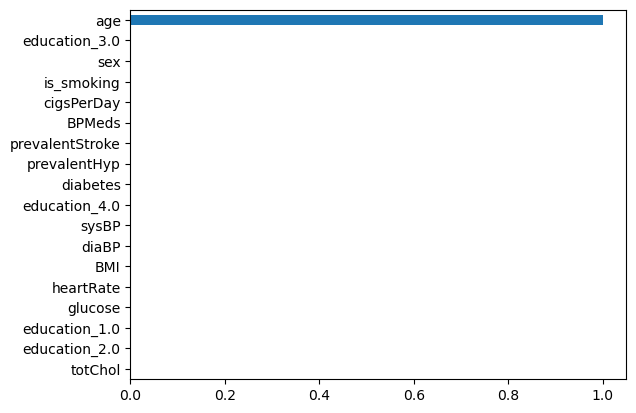

In [382]:
s1 = pd.Series(ada_boost.feature_importances_, index=x.columns)
s1.sort_values().plot(kind ='barh')

From Adaboost Age is factor mostly affecting CHD

In [383]:
AB1=print('Accuracy of AB1: ',acc)
AB1

Accuracy of AB1:  0.849188790560472


# BALANCING DATA

In [384]:
q=df['TenYearCHD'].value_counts()
q

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [385]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
x_sm,y_sm = smote.fit_resample(x,y)
# x_sm,y_sm = smote.fit(x,y)

In [386]:
y_sm=pd.DataFrame(y_sm)

In [387]:
y_sm.value_counts()

TenYearCHD
0             2879
1             2879
Name: count, dtype: int64

In [388]:
x = df.drop(['TenYearCHD'],axis=1)
y = df['TenYearCHD']
x_train , x_test , y_train , y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=11,stratify = y_sm)

In [389]:
x_train.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
education_1.0      0
education_2.0      0
education_3.0      0
education_4.0      0
dtype: int64

In [390]:
y_train.value_counts()

TenYearCHD
0             2303
1             2303
Name: count, dtype: int64

# 1) LOGISTIC REGRESSION

In [391]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [392]:
# Testing data evaluation
y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,y_pred_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_log)
print('classification_report : \n',clf_report)



confusion matrix :
 [[368 208]
 [171 405]]
Accuracy Score :  0.6710069444444444
classification_report : 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       576
           1       0.66      0.70      0.68       576

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



In [393]:
# Training data evaluation
y_pred_train_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report : \n',clf_report)


confusion matrix :
 [[1464  839]
 [ 758 1545]]
Accuracy Score :  0.6532783326096396
classification_report : 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65      2303
           1       0.65      0.67      0.66      2303

    accuracy                           0.65      4606
   macro avg       0.65      0.65      0.65      4606
weighted avg       0.65      0.65      0.65      4606



In [394]:
LR2=print('Accuracy of LR2: ',acc_score_LR)
LR2

Accuracy of LR2:  0.6532783326096396


# 2) KNN

# Feature Scaling

In [395]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [396]:
std_scaler.fit_transform(x_train)

array([[-0.39322472, -0.79946601,  1.07863665, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51438286, -0.79946601,  1.07863665, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09140785, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.45488227, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87785728, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93951483,  1.25083491, -0.92709626, ...,  0.        ,
         0.        ,  0.        ]])

In [397]:
std_scaler.transform(x_test)

array([[ 0.93951483, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27206658, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57604041, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.24133171, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87785728,  1.25083491,  1.07863665, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87785728, -0.79946601, -0.92709626, ...,  0.        ,
         0.        ,  0.        ]])

In [398]:
from sklearn.neighbors import KNeighborsClassifier

In [399]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [400]:
# Testing data evaluation
y_pred_knn = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_knn)
print('classification_report : \n',clf_report)


confusion matrix :
 [[381 195]
 [ 17 559]]
Accuracy Score :  0.6532783326096396
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.66      0.78       576
           1       0.74      0.97      0.84       576

    accuracy                           0.82      1152
   macro avg       0.85      0.82      0.81      1152
weighted avg       0.85      0.82      0.81      1152



In [401]:
# Training data evaluation
y_pred_train_knn = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_KNN = accuracy_score(y_train,y_pred_train_knn)
print("Accuracy Score : ",acc_score_KNN)

clf_report = classification_report(y_train,y_pred_train_knn)
print('classification_report : \n',clf_report)

confusion matrix :
 [[1706  597]
 [  25 2278]]
Accuracy Score :  0.8649587494572297
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      2303
           1       0.79      0.99      0.88      2303

    accuracy                           0.86      4606
   macro avg       0.89      0.86      0.86      4606
weighted avg       0.89      0.86      0.86      4606



In [402]:
KNN2= print('Accuracy of KNN2: ',acc_score_KNN)
KNN2

Accuracy of KNN2:  0.8649587494572297


# 3) SVM

In [403]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [404]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [405]:
# testing data evaluation
y_pred = svc_model.predict(x_test)

acc= accuracy_score(y_test,y_pred)
print('Accuracy is:', acc)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_test,y_pred)
print('Classification Report', Clf)

Accuracy is: 0.6545138888888888
Confusion Matrix [[357 219]
 [179 397]]
Classification Report               precision    recall  f1-score   support

           0       0.67      0.62      0.64       576
           1       0.64      0.69      0.67       576

    accuracy                           0.65      1152
   macro avg       0.66      0.65      0.65      1152
weighted avg       0.66      0.65      0.65      1152



In [406]:
# training data evaluation
y_pred_train = svc_model.predict(x_train)

acc= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_train,y_pred_train)
print('Classification Report', Clf)

Accuracy is: 0.6719496309161963
Confusion Matrix [[1481  822]
 [ 689 1614]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.64      0.66      2303
           1       0.66      0.70      0.68      2303

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606



# Hyperparameter Tunning

In [407]:
svm_clf =SVC()
hyp = {'C': np.arange(0,10,0.1),
      'kernel':['rbf'],
      'gamma': np.arange(0,10,0.1)}

rscv_svm = RandomizedSearchCV(svm_clf, hyp, cv=3)
rscv_svm.fit(x_train, y_train)
rscv_svm.best_params_

{'kernel': 'rbf', 'gamma': 2.8000000000000003, 'C': 1.9000000000000001}

In [408]:
rscv_svm.best_estimator_

SVC(C=1.9000000000000001, gamma=2.8000000000000003)

In [409]:
rscv_svm.best_params_

{'kernel': 'rbf', 'gamma': 2.8000000000000003, 'C': 1.9000000000000001}

In [410]:
y_pred_rscv= rscv_svm.predict(x_test)
y_pred_rscv

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [411]:
acc1= accuracy_score(y_test,y_pred_rscv)
print('Accuracy is', acc)

Accuracy is 0.6719496309161963


In [412]:
y_pred_rscv= rscv_svm.predict(x_train)
y_pred_rscv

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [413]:
acc2= accuracy_score(y_train,y_pred_rscv)
print('Accuracy is', acc)

Accuracy is 0.6719496309161963


In [414]:
# training rscv model data evaluation
y_pred_train = rscv_svm.predict(x_train)

acc_score_SVM= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc_score_SVM)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix', cnf_matrix)

Clf = classification_report(y_train,y_pred_train)
print('Classification Report', Clf)

Accuracy is: 1.0
Confusion Matrix [[2303    0]
 [   0 2303]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00      2303

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [415]:
SVM2=print('Accuracy of SVM2: ',acc_score_SVM)

Accuracy of SVM2:  1.0


# 4) NAVIE BAYES

In [416]:
import os
import glob
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Model Training

Given Data is binary.hence, we can it Bernoulli Naive Bayes

# I) Bernoulli NB

In [417]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train,y_train)

BernoulliNB()

In [418]:
def evaluation(string, model, ind_var, act):
    print(string.center(50,'*'))
    pred = model.predict(ind_var)
    cnf_matrix = confusion_matrix(act,pred)
    print('Confusion Matrix :\n', cnf_matrix)
    
    acc_score_NB = accuracy_score(act,pred)
    print('Accuracy :', acc_score_NB)
    
    clf_report = classification_report(act, pred)
    print('Classification Report :\n', clf_report)

In [419]:
print('BernoulliNB Model Results'.center(80,'*'))
evaluation('Train Data Evaluation', bnb_model, x_train, y_train)
print('*#'*30)
evaluation('Test Data Evaluation', bnb_model, x_test, y_test)

***************************BernoulliNB Model Results****************************
**************Train Data Evaluation***************
Confusion Matrix :
 [[1733  570]
 [1160 1143]]
Accuracy : 0.6244029526704299
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      2303
           1       0.67      0.50      0.57      2303

    accuracy                           0.62      4606
   macro avg       0.63      0.62      0.62      4606
weighted avg       0.63      0.62      0.62      4606

*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
***************Test Data Evaluation***************
Confusion Matrix :
 [[443 133]
 [294 282]]
Accuracy : 0.6293402777777778
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.77      0.67       576
           1       0.68      0.49      0.57       576

    accuracy                           0.63      1152
   macro av

In [423]:
BNB2=print('Accuracy of BNB2 is 0.6244029526704299')
BNB2

Accuracy of BNB2 is 0.6244029526704299


# 5) DECISION TREE

In [424]:
from sklearn.tree import DecisionTreeClassifier

In [425]:
dt_model = DecisionTreeClassifier()
#rscv_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [426]:
# Testing data evaluation
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[453 123]
 [ 88 488]]
Accuracy Score :  0.8168402777777778
classification_report : 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       576
           1       0.80      0.85      0.82       576

    accuracy                           0.82      1152
   macro avg       0.82      0.82      0.82      1152
weighted avg       0.82      0.82      0.82      1152



In [427]:
# Training data evaluation
y_pred_train_dt= dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2303    0]
 [   0 2303]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00      2303

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [428]:
##HYPER PARAMETER TUNNING
dt_model=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        
      
      }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [429]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=6)

In [430]:
# Training data evaluation
rscv_model_train= rscv_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[2303    0]
 [   0 2303]]
Accuracy Score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       1.00      1.00      1.00      2303

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [431]:
DT2= print('Accuracy of DT2: ',acc_score_DT)

Accuracy of DT2:  1.0


# 6) RANDOM FOREST

BASSING ENSEMBLE TECHNIQUE

In [432]:
from sklearn.ensemble import RandomForestClassifier

In [433]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [434]:
rf_model=rscv_model.best_estimator_
rf_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=6)

In [435]:
# Testing data evaluation
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_RF = accuracy_score(y_test,y_pred_rf)
print("Accuracy Score : ",acc_score_RF)

clf_report = classification_report(y_test , y_pred_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[436 140]
 [166 410]]
Accuracy Score :  0.734375
classification_report : 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       576
           1       0.75      0.71      0.73       576

    accuracy                           0.73      1152
   macro avg       0.73      0.73      0.73      1152
weighted avg       0.73      0.73      0.73      1152



In [436]:
# Training data evaluation
y_pred_train_rf= rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_rf = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy Score : ",acc_score_rf)

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[1902  401]
 [ 505 1798]]
Accuracy Score :  0.803300043421624
classification_report : 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      2303
           1       0.82      0.78      0.80      2303

    accuracy                           0.80      4606
   macro avg       0.80      0.80      0.80      4606
weighted avg       0.80      0.80      0.80      4606



In [437]:
## HYPERPARAMETER TUNNING
rf_model = RandomForestClassifier()
hyp = hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10),
             'n_estimators':np.arange(60,100),
             
      
      }
rscv_model = RandomizedSearchCV(rf_model,hyp,random_state=52,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   random_state=52)

In [438]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       min_samples_split=4, n_estimators=77)

In [439]:
# Training data evaluation
y_pred_train_rscv_model= rscv_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion matrix :\n',cnf_matrix)

acc_score_RF = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy Score : ",acc_score_RF)

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report : \n',clf_report)

confusion matrix :
 [[1902  401]
 [ 505 1798]]
Accuracy Score :  0.803300043421624
classification_report : 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      2303
           1       0.82      0.78      0.80      2303

    accuracy                           0.80      4606
   macro avg       0.80      0.80      0.80      4606
weighted avg       0.80      0.80      0.80      4606



In [440]:
RF2=print('Accuracy of RF2: ',acc_score_RF)
RF2

Accuracy of RF2:  0.803300043421624


# 7) ADABOOST

In [441]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Training

In [442]:
ada_boost = AdaBoostClassifier(n_estimators=1,random_state=1)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1, random_state=1)

In [443]:
# Testing data evaluation

y_pred = ada_boost.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is\n', cnf_matrix)

acc = accuracy_score(y_test,y_pred)
print('Accuracy is', acc)

clf_report= classification_report(y_test,y_pred)
print('Classification report', clf_report)

Confusion Matrix is
 [[263 313]
 [113 463]]
Accuracy is 0.6302083333333334
Classification report               precision    recall  f1-score   support

           0       0.70      0.46      0.55       576
           1       0.60      0.80      0.68       576

    accuracy                           0.63      1152
   macro avg       0.65      0.63      0.62      1152
weighted avg       0.65      0.63      0.62      1152



In [444]:
# Training data evaluation

y_pred_train = ada_boost.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is\n', cnf_matrix)

acc_score_AB = accuracy_score(y_train,y_pred_train)
print('Accuracy is', acc_score_AB)

clf_report= classification_report(y_train,y_pred_train)
print('Classification report', clf_report)

Confusion Matrix is
 [[1063 1240]
 [ 399 1904]]
Accuracy is 0.644159791576205
Classification report               precision    recall  f1-score   support

           0       0.73      0.46      0.56      2303
           1       0.61      0.83      0.70      2303

    accuracy                           0.64      4606
   macro avg       0.67      0.64      0.63      4606
weighted avg       0.67      0.64      0.63      4606



In [445]:
ada_boost.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [446]:
s1 = pd.Series(ada_boost.feature_importances_, index=x.columns)
s1

age                1.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
education_1.0      0.0
education_2.0      0.0
education_3.0      0.0
education_4.0      0.0
dtype: float64

<Axes: >

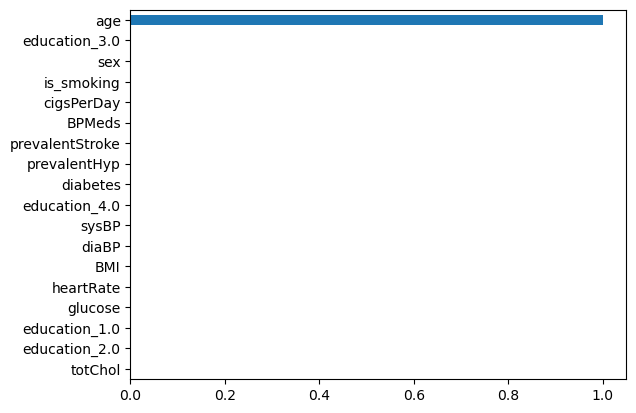

In [447]:
s1 = pd.Series(ada_boost.feature_importances_, index=x.columns)
s1.sort_values().plot(kind ='barh')

Age is the major factor affecting CHD.

In [448]:
AB2=print('Accuracy of AB2: ',acc_score_AB)
AB2

Accuracy of AB2:  0.644159791576205


# ACCURACY

In [450]:
Data=[['LR',acc_score_LR,0.495466321,0.664350847,0.567612688],['KNN',acc_score_KNN,0.431539424,0.748588797,0.547475389],['SVM', acc_score_SVM,0.480688088,0.643074251,0.550148588],['NB',6244029526704299,0.593289969,0.752496743,0.663476263
],['RF',acc_score_RF,0.487516088,0.822405558,0.612152553
],['AB',acc_score_AB,0.361196058,0.461571863,0.405261151
]]
Data

[['LR', 0.6532783326096396, 0.495466321, 0.664350847, 0.567612688],
 ['KNN', 0.8649587494572297, 0.431539424, 0.748588797, 0.547475389],
 ['SVM', 1.0, 0.480688088, 0.643074251, 0.550148588],
 ['NB', 6244029526704299, 0.593289969, 0.752496743, 0.663476263],
 ['RF', 0.803300043421624, 0.487516088, 0.822405558, 0.612152553],
 ['AB', 0.644159791576205, 0.361196058, 0.461571863, 0.405261151]]

In [451]:
D=pd.DataFrame(Data,columns=['Model','Accuracy','RECALL','PRECISION','F1 SCORE'])
D

Model      Accuracy    RECALL  PRECISION  F1 SCORE
0    LR  6.532783e-01  0.495466   0.664351  0.567613
1   KNN  8.649587e-01  0.431539   0.748589  0.547475
2   SVM  1.000000e+00  0.480688   0.643074  0.550149
3    NB  6.244030e+15  0.593290   0.752497  0.663476
4    RF  8.033000e-01  0.487516   0.822406  0.612153
5    AB  6.441598e-01  0.361196   0.461572  0.405261

From above data we can conclude that KNN is best fitted model as its Accuracy is 86.77%.

In [452]:
y_pred_knn= knn_model.predict(x_train)
y_pred_knn

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [453]:
KNNData=pd.DataFrame(y_pred_knn,columns=['PREDICTION'])
KNNData

PREDICTION
0              0
1              0
2              1
3              1
4              0
...          ...
4601           0
4602           0
4603           0
4604           0
4605           1

[4606 rows x 1 columns]

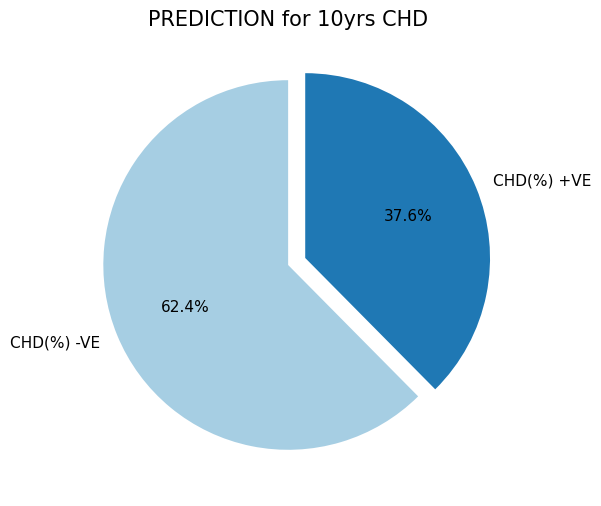

In [454]:
colors=sns.color_palette("Paired")
plt.figure(figsize=(10,6))
explode=[0,0.1]
textprops={'fontsize':11}
plt.pie(KNNData['PREDICTION'].value_counts(),labels=['CHD(%) -VE','CHD(%) +VE'],startangle=90,colors=colors,explode=explode,autopct="%1.1f%%",textprops=textprops)
plt.title('PREDICTION for 10yrs CHD',fontsize=15)
plt.show()

# CONCLUSION:

By Predicting Data of 10 years from KNN model, we can conclude that rate of Cardiovascular Heart Disease will be less.